###Raisa Salsabil Yusriyya (20/456376/TK/50506) - Tugas 2 Rekayasa Data

https://colab.research.google.com/drive/1z32Hiaaj2VKwbX8piIUKowd0BRrMr-wY?usp=sharing

##Libraries

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None) # batas column yang ditampilkan pada table dataframe = None

##Informasi dataset:

**Atribut/Fitur/Kolom:**
- Gender: Gender penumpang (Female, Male)

- Customer Type: tipe pelanggan (Loyal customer, disloyal customer)

- Age: Umur penumpang

- Type of Travel: tujuan melakukan penerbangan (Personal Travel, Business Travel)

- Class: class dalam penerbangan (Business, Eco, Eco Plus).

- Flight distance: jarak penerbangan.

- Inflight wifi service: Tingkat kepuasan terhadap layanan Wi-Fi di pesawat(1-5)

- Departure/Arrival time convenient: tingkat kepuasan dari waktu kedatangan/keberangkatan pesawat.

- Ease of Online booking: tingkat kepuasan dalam pemesanan tiket online.

- Gate location: tingkat kepuasan dari lokasi gerbang.

- Food and drink: tingkat kepuasan dari makanan dan minuman yang diberikan.

- Online boarding: tingkat kepuasan untuk online boarding.

- Seat comfort: tingkat kepuasan terhadap tempat duduk.

- Inflight entertainment: tingkat kepuasan terhadap hiburan dalam penerbangan.

- On-board service: tingkat kepuasan terhadap pelayanan dalam penerbangan

- Leg room service: tingkat kepuasan terhadap legroom (area untuk menaruh kaki saat duduk).

- Baggage handling: tingkat kepuasan terhadap penanganan bagasi.

- Check-in service: tingkat kepuasan terhadap Check-in service.

- Inflight service: tingkat kepuasan terhadap inflight service.

- Cleanliness: tingkat kepuasan terhadap kebersihan.

- Departure Delay in Minutes: menit tunda saat keberangkatan.

- Arrival Delay in Minutes: menit delay saat kedatangan.

####Label:
- Satisfaction: tingkat kepuasan terhadap maskapai (Satisfaction, neutral or dissatisfaction)

In [154]:
url = 'https://raw.githubusercontent.com/raisasalsabily/airline-passenger-satisfaction-analysis/main/airline-data.csv'
airline1_df = pd.read_csv(url)
airline1_df.head(6) # show dataframe

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,5,5,3,5,4,3,1,1,2,5,0,0.0,satisfied


## Data Integration (Gabungkan 2 Dataset)

- Terdapat 2 file csv dari Kaggle, yaitu train dan test. Kali ini tidak akan dilakukan train ataupun test model machine learning. 
- Oleh karena itu, data test dan train dapat digabungkan untuk dianalisis dan dilihat insight-nya.

- Berikut dataframe ke-2:

In [155]:
url = 'https://raw.githubusercontent.com/raisasalsabily/airline-passenger-satisfaction-analysis/main/airline-data-2.csv'
airline2_df = pd.read_csv(url)
airline2_df.head(5) # show dataframe

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


Gabungkan dataframe.

In [156]:
airline_df = [airline1_df, airline2_df]
  
airline_df = pd.concat(airline_df)
display(airline_df)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


## Reduction - Drop Kolom ID dan Unnamed: 0

Drop fitur yang tidak diperlukan.

In [157]:
airline_df.drop(airline_df.columns[[0, 1]], axis=1, inplace=True)

In [158]:
airline_df.head(6) # show dataframe

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
5,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,5,5,3,5,4,3,1,1,2,5,0,0.0,satisfied


# Data Cleaning

###Outlier Detection and Removal

In [159]:
fitur_numerik = airline_df.select_dtypes(exclude=['object'])
fitur_numerik.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

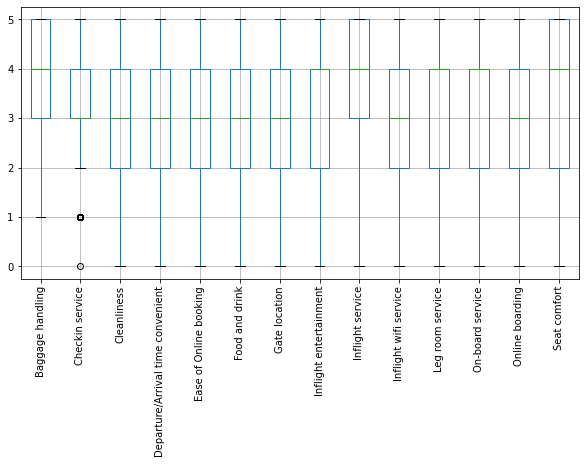

In [160]:
boxpl_exclude = ["Age",'Flight Distance', 'Departure Delay in Minutes', "Arrival Delay in Minutes"]
airline_df.loc[:, airline_df.columns.difference(boxpl_exclude)].boxplot(figsize=(10,5),rot=90) 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

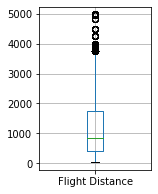

In [161]:
airline_df.boxplot(column=['Flight Distance'], figsize=(2,3)) 

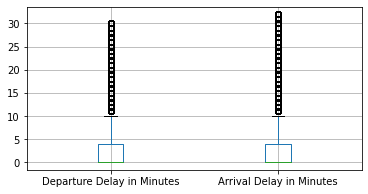

In [197]:
airline_df.boxplot(column=(['Departure Delay in Minutes', "Arrival Delay in Minutes"]), figsize=(6,3)) 

- Terlihat bahwa terdapat outliers pada fitur flight distance, departure delay in minutes, dan arrival delay in minutes.
- Remove data dengan outliers.

Ukuran dataframe awalnya adalah:


In [163]:
# Banyak rows dataframe awal
print("Banyak rows dataframe awal: {}".format(len(airline_df)))

Banyak rows dataframe awal: 129880


Hitung IQR untuk menetapkan batas

In [164]:
Q1 = airline_df.quantile(0.25)
Q3 = airline_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                                    24.0
Flight Distance                      1330.0
Inflight wifi service                   2.0
Departure/Arrival time convenient       2.0
Ease of Online booking                  2.0
Gate location                           2.0
Food and drink                          2.0
Online boarding                         2.0
Seat comfort                            3.0
Inflight entertainment                  2.0
On-board service                        2.0
Leg room service                        2.0
Baggage handling                        2.0
Checkin service                         1.0
Inflight service                        2.0
Cleanliness                             2.0
Departure Delay in Minutes             12.0
Arrival Delay in Minutes               13.0
dtype: float64


Remove outliers.

In [165]:
# Remove outlier dari dataframe
airline_df = airline_df[~((airline_df.lt(Q1 - 1.5 * IQR)) |(airline_df.gt(Q3 + 1.5 * IQR))).any(axis=1)]

# Banyak rows dataframe setelah outliers removal
print("Banyak rows dataframe setelah outliers removal: {}".format(len(airline_df)))

Banyak rows dataframe setelah outliers removal: 93648


### Detect Missing Data
Mengecek apakah dalam dataset terdapat missing data.

In [166]:
total = airline_df.isnull().sum().sort_values(ascending=False)
persen = (airline_df.isnull().sum()/airline_df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, persen], axis=1, keys=['Total', 'Persen'])
missing.head(10)

,Total,Persen
Arrival Delay in Minutes,232,0.002477
Gender,0,0.000000
Seat comfort,0,0.000000
Departure Delay in Minutes,0,0.000000
Cleanliness,0,0.000000
Inflight service,0,0.000000
Checkin service,0,0.000000
Baggage handling,0,0.000000
Leg room service,0,0.000000
On-board service,0,0.000000


- Ditemukan missing data dalam kolom "Arrival Delay in Minutes". 
- Missing data akan di-handle.

### Handling Missing Data

Gunakan mean dari "Arrival Delay in Minutes" untuk mengisi missing values.

In [167]:
# cek berapa mean dari kolom "Arrival Delay in Minutes"
arv_delay_mean = np.mean(airline_df["Arrival Delay in Minutes"])
print('Mean dari "Arrival Delay in Minutes" adalah: {} menit'.format(arv_delay_mean))

Mean dari "Arrival Delay in Minutes" adalah: 3.4947118266678086 menit


Fill missing values dengan mean.

In [168]:
airline_df["Arrival Delay in Minutes"]=airline_df["Arrival Delay in Minutes"].fillna(np.mean(airline_df["Arrival Delay in Minutes"]))

Cek apakah masih terdapat missing values pada kolom "Arrival Delay in Minutes".

In [169]:
total = airline_df.isnull().sum().sort_values(ascending=False)
persen = (airline_df.isnull().sum()/airline_df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, persen], axis=1, keys=['Total', 'Persen'])
missing.head()

,Total,Persen
Gender,0,0.0
Seat comfort,0,0.0
Arrival Delay in Minutes,0,0.0
Departure Delay in Minutes,0,0.0
Cleanliness,0,0.0


Missing values pada kolom "Arrival Delay in Minutes" sudah terisi semua dengan mean-nya.

### Detect Duplicated records.

In [170]:
df = pd.DataFrame(airline_df)
df[df.duplicated(keep = 'last')]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


Tidak ada duplicated records.

###Value  Conversion - Feature dengan value bukan numerik diubah menjadi numerik.

In [171]:
airline_df = airline_df.copy()
airline_df_num = airline_df.copy()

In [172]:
lbl_encode = {}
for col in airline_df_num.select_dtypes(include=['object']).columns:
    lbl_encode[col] = LabelEncoder()
    airline_df_num[col] = lbl_encode[col].fit_transform(airline_df_num[col])

# show
airline_df_num.head(5) # dataframe setelah konversi ke numerik

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,0,0,36,0,0,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,0,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1
8,1,0,47,0,1,556,5,2,2,2,5,5,5,5,2,2,5,3,3,5,1,0.0,1


In [173]:
airline_df.head(4) # dataframe sebelum konversi ke numerik

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [174]:
airline_df_num.head(4) # cek ulang dataframe setelah konversi ke numerik

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,0,0,36,0,0,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,0,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1


## Data Integration
###Correlation Analysis

Dilakukan correlation analysis terhadap fitur-fitur yang ada.

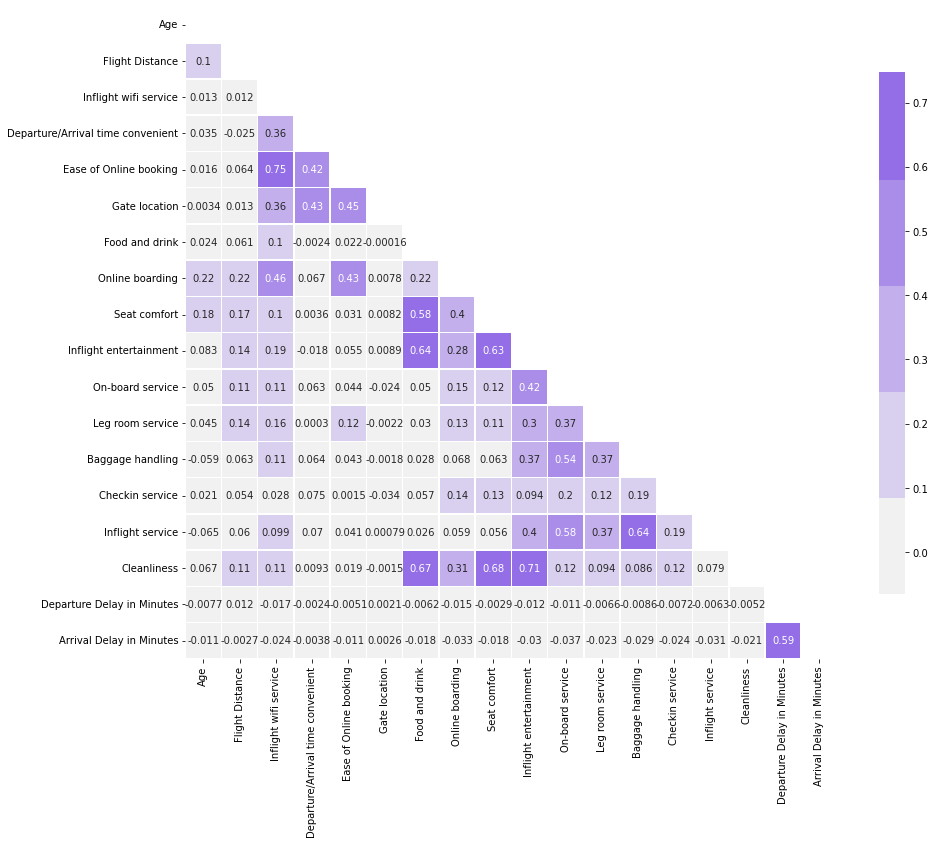

In [175]:
feature_corr = airline_df.corr()
mask_val = np.triu(np.ones_like(feature_corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 12))
cmap_val = sns.diverging_palette(150, 275, s=80, l=55, n=9)
sns.heatmap(feature_corr, mask=mask_val, cmap=cmap_val, center=0,square=True, annot=True, linewidths=.6, cbar_kws={"shrink": .8})

Ditemukan nilai korelasi yang tinggi pada:
- Ease of online booking dan inflight wifi service (0.75).
- Cleanliness dan Inflight entertainment (0.71).


Akan tetapi tidak ada korelasi dengan nilai 1 atau yang sangat mendekati 1. 
- Maka tidak ada multi-kolinearitas sehingga tidak akan ada fitur yang di-drop atau dihilangkan.

##Data Reduction
### Feature Selection - Memilih Fitur yang Paling Berpengaruh terhadap Satisfaction

In [176]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2

In [177]:
# normalisasi
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(airline_df_num)
modified_data = pd.DataFrame(r_scaler.transform(airline_df_num), columns=airline_df_num.columns)
modified_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,0.0,0.371795,0.0,0.0,0.763754,0.2,0.2,0.6,0.2,1.0,0.8,1.00,0.8,0.8,0.8,0.75,0.333333,0.8,1.0,0.000000,0.0000,1.0
1,1.0,1.0,0.166667,0.0,0.5,0.043420,0.4,0.0,0.4,0.8,0.4,0.4,0.25,0.4,0.8,0.2,0.50,0.000000,0.4,0.4,0.000000,0.0000,0.0
2,1.0,0.0,0.474359,0.0,0.0,0.902373,0.0,0.0,0.0,0.4,0.6,0.8,0.75,0.2,0.2,0.2,0.00,0.333333,0.2,0.8,0.000000,0.1875,1.0
3,0.0,0.0,0.538462,0.0,0.5,0.310410,0.4,0.6,0.8,0.6,0.8,0.2,0.25,0.4,0.4,0.4,0.25,0.666667,0.4,0.8,0.000000,0.6250,1.0
4,1.0,0.0,0.512821,0.0,0.5,0.141586,1.0,0.4,0.4,0.4,1.0,1.0,1.00,1.0,0.4,0.4,1.00,0.333333,0.6,1.0,0.033333,0.0000,1.0


In [178]:
from sklearn.ensemble import RandomForestClassifier as ranfor
from sklearn.feature_selection import SelectFromModel

In [179]:
# metode wrapper
y = airline_df_num['satisfaction']
X = airline_df_num.drop('satisfaction', axis=1)

selektor = SelectFromModel(ranfor(n_estimators=100, random_state=0))
selektor.fit(X, y)
support = selektor.get_support()
fitur = X.loc[:,support].columns.tolist()
print(fitur)
print(ranfor(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Type of Travel', 'Class', 'Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment']
[0.00432496 0.0420478  0.03351448 0.11661703 0.09327608 0.0387752
 0.14746743 0.01751792 0.03974238 0.01774044 0.01158828 0.16795057
 0.05156939 0.04806799 0.02818477 0.0388688  0.0209814  0.01944685
 0.02015054 0.02423809 0.00836883 0.0095608 ]


Dengan metode wrapper ditemukan bahwa fitur-fitur di atas adalah fitur yang paling memengaruhi satisfaction. Maka yang akan banyak dianalisis adalah fitur tersebut.
- Maka data-data tersebut akan dimasukkan dalam dataframe **main_df**, berikut.

In [180]:
main_df = airline_df[['Type of Travel', 'Class', 'Inflight wifi service', 'Online boarding',
                      'Seat comfort', 'Inflight entertainment', 'satisfaction']]

# Analisis dan Visualisasi

## Central Tendency (Tren Pemusatan)

Menampilkan tren-tren dari data, seperti mean, median (row 50%), modus (row top)

In [181]:
airline_df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,93648.000000,93648.000000,93648.000000,93648.000000,93648.000000,93648.000000,93648.000000,93648.000000,93648.000000,93648.000000,93648.000000,93648.000000,93648.000000,93648.000000,93648.000000,93648.000000,93648.000000,93648.000000
mean,39.509194,1148.371156,2.751719,3.095485,2.761639,2.960063,3.239631,3.316675,3.501100,3.401076,3.472770,3.394627,3.707522,3.640270,3.732392,3.340669,3.454233,3.494712
std,15.116318,929.586483,1.348435,1.538921,1.407922,1.286156,1.321152,1.356459,1.315386,1.332524,1.264419,1.304881,1.171175,0.983246,1.161311,1.302098,6.725357,6.730553
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,409.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,837.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1709.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000
max,85.000000,3739.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,32.000000


In [182]:
# Median
airline_df.median(numeric_only=True)

Age                                   40.0
Flight Distance                      837.0
Inflight wifi service                  3.0
Departure/Arrival time convenient      3.0
Ease of Online booking                 3.0
Gate location                          3.0
Food and drink                         3.0
Online boarding                        4.0
Seat comfort                           4.0
Inflight entertainment                 4.0
On-board service                       4.0
Leg room service                       4.0
Baggage handling                       4.0
Checkin service                        4.0
Inflight service                       4.0
Cleanliness                            3.0
Departure Delay in Minutes             0.0
Arrival Delay in Minutes               0.0
dtype: float64

In [183]:
# Modus
df_mode = airline_df.mode()
df_mode.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,39,Business travel,Business,337,2,4,3,3,4,4,4,4,4,4,4,4,4,4,0,0.0,neutral or dissatisfied


###Sebaran Nilai Kepuasan terhadap Layanan-Layanan

Nilai layanan-layanan (skala diskrit 1-5) ada yang terdistribusi normal, tetapi kebanyakan condong (skew) ke kanan dengan mayoritas memberi nilai 4. 

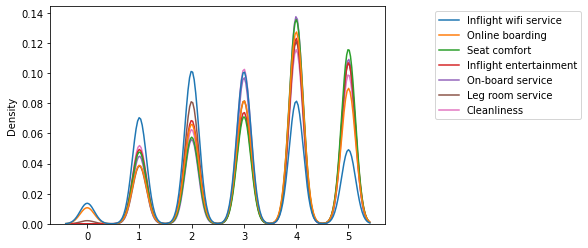

In [184]:
factors_df = airline_df[['Class', 'Inflight wifi service',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Cleanliness'
]]
factors_plot = sns.kdeplot(data=factors_df)
sns.move_legend(factors_plot, bbox_to_anchor=(1.6, 1), loc='upper right')

# Analisis Data

Berapakah penumpang yang puas dan tidak puas/netral dengan pelayanan maskapai penerbangan?

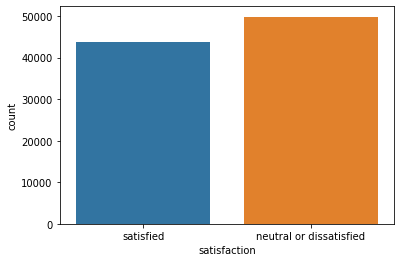

Jumlah numerik pelanggan puas dan tidak puas/netral:


neutral or dissatisfied    49843
satisfied                  43805
Name: satisfaction, dtype: int64

In [185]:
# count plot pada kolom satisfaction
sns.countplot(x ='satisfaction', data = airline_df)
plt.show() 

print("Jumlah numerik pelanggan puas dan tidak puas/netral:")
airline_df['satisfaction'].value_counts()

In [186]:
# Persentase kepuasan pelanggan
satisfied_pass = round((airline_df[airline_df["satisfaction"]=="satisfied"].shape[0]/airline_df.shape[0])*100, 3)
print("Penumpang yang puas: {} % ".format(satisfied_pass))

not_satisfied_pass = round((airline_df[airline_df["satisfaction"]=="neutral or dissatisfied"].shape[0]/airline_df.shape[0])*100, 3)
print("Penumpang yang tidak puas/netral: {} % ".format(not_satisfied_pass))

Penumpang yang puas: 46.776 % 
Penumpang yang tidak puas/netral: 53.224 % 


Dengan demikian, diketahui bahwa **penumpang yang tidak puas/netral lebih banyak daripada yang puas**.

###Apa saja yang memengaruhinya?
- Diketahui bahwa terdapat 3 kelas penerbangan, yaitu **Business, Economy, dan Eco Plus**. Kelas yang dipilih kemungkinan akan memengaruhi kepuasan pelanggan, terlepas dari harganya yang memang variatif.

- Lalu, faktor-faktor yang mendukung bahwa class akan memengaruhi pelanggan terdiri dari kolom lainnya yang sudah diketahui penting melalui hitungan metode wrapper, yaitu 'Type of Travel', 'Class', 'Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment'.
 

--> Oleh karena itu, **hipotesis** awalnya adalah **Class akan memengaruhi kepuasan pelanggan, dengan didukung pula oleh fitur-fitur lainnya**.
<br><br>

Berikut adalah nilai rata-rata kepuasan terhadap tiap layanan pada masing-masing class.

In [187]:
main_df.groupby('Class')[main_df.columns[2:]].mean()

,Inflight wifi service,Online boarding,Seat comfort,Inflight entertainment
Class,,,,
Business,2.802634,3.795139,3.838958,3.702131
Eco,2.689438,2.840067,3.166679,3.101240
Eco Plus,2.783923,2.924131,3.210313,3.153762


#Rata-Rata Kepuasan terhadap Layanan

Layanan dibagi menjadi 2 cluster:
1.	Per Class: layanan yang berbeda untuk tiap class, misal “Seat comfort”.
2.	General (umum): layanan yang sama untuk tiap class, misal “Online boarding”.


In [188]:
# Service Keseluruhan
service_df = main_df[['Class','Inflight wifi service', 'Online boarding', 
                         'Seat comfort', 'Inflight entertainment']]

# Service per class (berbeda untuk tiap class)
service_perclass_df = main_df[['Class','Seat comfort', 'Inflight entertainment']]
            
# General service (sama untuk tiap class)
service_general_df = main_df[['Class','Online boarding']]           

###Mean layanan:

Selanjutnya, mean dari tiap kelas penerbangan dicari untuk melihat kelas apa yang akan jadi fokus perbaikan.

In [189]:
# Mean layanan secara keseluruhan
eco = service_df[service_df['Class']=='Eco'].mean(numeric_only=True).mean()
ecoplus = service_df[service_df['Class']=='Eco Plus'].mean(numeric_only=True).mean()
business = service_df[service_df['Class']=='Business'].mean(numeric_only=True).mean()

print("Mean dari kepuasan terhadap service keseluruhan di class (skala 1-5): \nEconomy: {} \nEconomy Plus: {} \nBusiness: {} ".format(eco, ecoplus, business))
print('\n')

# Mean layanan yang berbeda tiap class
eco_per = service_perclass_df[service_perclass_df['Class']=='Eco'].mean(numeric_only=True).mean()
ecoplus_per = service_perclass_df[service_perclass_df['Class']=='Eco Plus'].mean(numeric_only=True).mean()
business_per = service_perclass_df[service_perclass_df['Class']=='Business'].mean(numeric_only=True).mean()

print("Mean dari kepuasan terhadap service yang berbeda di tiap class (skala 1-5): \nEconomy: {} \nEconomy Plus: {} \nBusiness: {} ".format(eco_per, ecoplus_per, business_per))
print('\n')

# Mean layanan yang sama tiap class (general)
eco_gen = service_general_df[service_general_df['Class']=='Eco'].mean(numeric_only=True).mean()
ecoplus_gen = service_general_df[service_general_df['Class']=='Eco Plus'].mean(numeric_only=True).mean()
business_gen = service_general_df[service_general_df['Class']=='Business'].mean(numeric_only=True).mean()

print("Mean dari kepuasan terhadap general service di semua class (skala 1-5): \nEconomy: {} \nEconomy Plus: {} \nBusiness: {} ".format(eco_gen, ecoplus_gen, business_gen))
print('\n')

Mean dari kepuasan terhadap service keseluruhan di class (skala 1-5): 
Economy: 2.9493558364384698 
Economy Plus: 3.0180324038012154 
Business: 3.5347156038814767 


Mean dari kepuasan terhadap service yang berbeda di tiap class (skala 1-5): 
Economy: 3.133959231387448 
Economy Plus: 3.182037700576414 
Business: 3.7705445330098772 


Mean dari kepuasan terhadap general service di semua class (skala 1-5): 
Economy: 2.8400672170672903 
Economy Plus: 2.924131484654931 
Business: 3.7951394905562292 




- Dapat dilihat bahwa rata-rata kepuasan penumpang kelas Economy lebih rendah daripada bisnis. 
- Layanan yang berbeda tiap class paling tinggi pada Business class, terendah pada Economy Plus class.

###Maskapai menyediakan service (yang kita anggap paling berpengaruh) dengan MEAN sebagai berikut.

Mean dari tiap layanan dicari untuk melihat layanan apa yang akan jadi fokus perbaikan. 

In [190]:
service_df.describe().loc[['mean']]

,Inflight wifi service,Online boarding,Seat comfort,Inflight entertainment
mean,2.751719,3.316675,3.5011,3.401076


- Pada tabel di atas dapat dilihat mean dari masing-masing service. 
- Dengan mengetahui mean, dapat diketahui layanan apa yang akan diperbaiki.
- Jika ingin meratakan layanan maka, perbaiki layanan dengan mean rendah.
- Jika ingin fokus pada layanan tertentu, abaikan layanan dengan mean rendah.

#Hubungan Antar-Atribut

###Pengaruh Online Boarding terhadap Kepuasan Penumpang berdasarkan Class Penerbangan

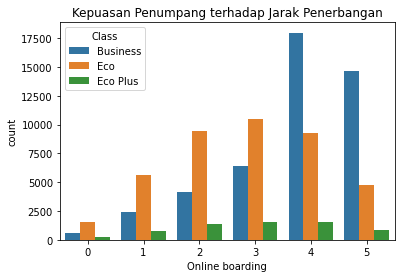

In [191]:
# main_df = main_df[~main_df.index.duplicated()]
sns.countplot(data=main_df, x="Online boarding", hue="Class")
plt.title("Kepuasan Penumpang terhadap Jarak Penerbangan")

plt.show()

- Terlihat bahwa penumpang yang memberikan nilai tinggi untuk "Online boarding" mayoritas berasal dari kelas Business.
- Nilai "Online boarding" untuk kelas Economy tersebar merata, mayoritas bernilai 3 dari 5.

### Pengaruh Inflight Entertainment (Hiburan saat Penerbangan) terhadap Kepuasan Penumpang berdasarkan Class Penerbangan

[Text(0.5, 0, 'Inflight Entertainment (Hiburan saat Penerbangan) Satisfaction')]

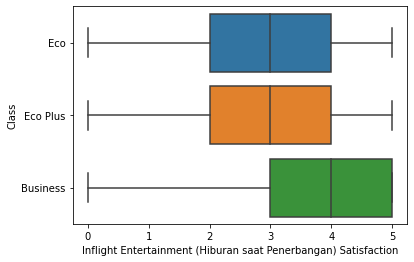

In [192]:
box_plot_food = sns.boxplot(data=main_df, x="Inflight entertainment", y="Class", order=["Eco", "Eco Plus", "Business"])
box_plot_food.set(xlabel='Inflight Entertainment (Hiburan saat Penerbangan) Satisfaction')

- Ternyata ditemukan bahwa kepuasan terhadap Inflight Entertainment (Hiburan saat Penerbangan) paling tinggi ada pada kelas Business.
- Inflight Entertainment pada kelas economy dan economy plus menjadi fokus perbaikan.

###Pengaruh Penyediaan Wi-Fi terhadap Kepuasan Penumpang berdasarkan Class Penerbangan

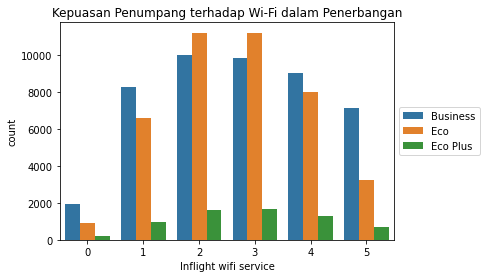

In [193]:
countplot_wifi = sns.countplot(data=main_df, x="Inflight wifi service", hue="Class")
plt.title("Kepuasan Penumpang terhadap Wi-Fi dalam Penerbangan")

countplot_wifi.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# countplot_wifi.set(xlabel='Wi-Fi satisfaction')

- Terlihat bahwa sebaran kepuasan terhadap Wi-Fi dalam penerbangan pada tiap Class tersebar merata. 
- Maka layanan Wi-Fi harus diperbaiki pada tiap kelas penerbangan.

###Pengaruh Seat Comfort terhadap Kepuasan Penumpang berdasarkan Class Penerbangan

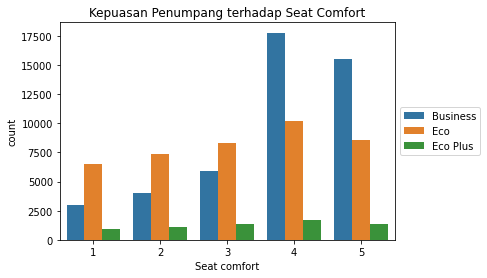

In [194]:
countplot_wifi = sns.countplot(data=main_df, x="Seat comfort", hue="Class")
plt.title("Kepuasan Penumpang terhadap Seat Comfort")

countplot_wifi.legend(loc='center left', bbox_to_anchor=(1, 0.5))

- Terlihat bahwa penumpang yang memberikan nilai tinggi untuk "Seat comfort" mayoritas berasal dari kelas Business.

###Pengaruh Type of Travel terhadap Satisfaction Berdasarkan Class Penerbangan

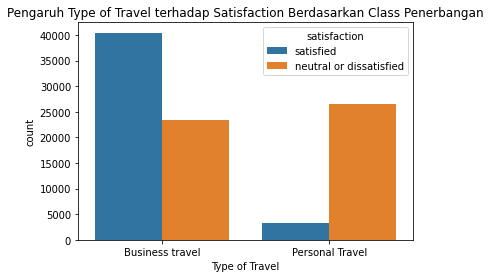

In [195]:
# main_df = main_df[~main_df.index.duplicated()]
sns.countplot(data=main_df, x="Type of Travel", hue="satisfaction")
plt.title("Pengaruh Type of Travel terhadap Satisfaction Berdasarkan Class Penerbangan")
plt.show()

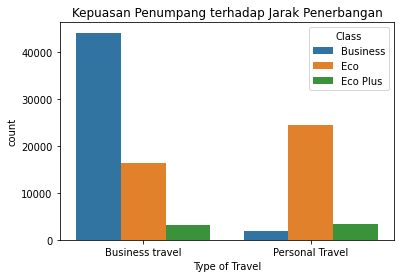

In [196]:
# main_df = main_df[~main_df.index.duplicated()]
sns.countplot(data=main_df, x="Type of Travel", hue="Class")
plt.title("Kepuasan Penumpang terhadap Jarak Penerbangan")

plt.show()

- Pada plot ke-1 terlihat bahwa penumpang yang puas mayoritas memiliki tujuan penerbangan "Business travel".
-  Penumpang dengan tujuan "Personal travel lebih banyak yang netral/tidak puas".
- Pada plot ke-2 terlihat bahwa penumpang dengan tujuan "Business travel mayoritas memilih kelas penerbangan Business.

- Maka dapat **disimpulkan** bahwa penumpang dengan tujuan penerbangan "Personal travel" banyak yang netral/tidak puas karena kebanyakan memilih class Economy. Sementara itu, penumpang dengan tujuan penerbangan "Business travel" banyak yang puas karena kebanyakan memilih class Business.

## Simpulan

  Dataset telah melalui preprocessing, lalu dianalisis. Dari analisis data di atas terlihat bahwa kelas penerbangan (Business, Economy, dan Economy Plus) memang memengaruhi kepuasan pelanggan dan dipengaruhi pula oleh fitur-fitur layanan lainnya. Dari hasil feature selection pada data reduction, ditemukan bahwa fitur-fitur yang paling memengaruhi kepuasan adalah 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Online boarding', 'Seat comfort', dan 'Inflight entertainment'. <br><br>
  Dari hasil visualisasi, dapat dianalisis bahwa secara rata-rata penumpang kelas Business memberikan nilai kepuasan terhadap layanan yang tinggi, sedangkan penumpang kelas Economy dan Economy Plus lebih banyak memberikan nilai rendah. Maka dari itu, perlu dilakukan perbaikan yang berfokus pada kelas Economy dan Economy Plus. Fitur atau layanan yang sebaiknya menjadi fokus perbaikan pada kelas Economy dan Economy Plus adalah 'Inflight wifi service', 'Online boarding', 'Seat comfort', dan 'Inflight entertainment'.<br><br>
  Jika layanan 'Online boarding' diperbaiki, maka tidak hanya kelas Economy dan Economy Plus saja yang diuntungkan, tetapi kelas Business juga mendapatkan keuntungan karena layanan onlilne boarding berlaku untuk semua class. Ini dapat menjadi cara meningkatkan kepuasan penumpang dengan penghematan biaya.<br><br>
  Dengan demikian dapat disimpulkan bahwa untuk meningkatkan kepuasan penumpang, maskapai dapat berfokus untuk memperbaiki layanan 'Inflight wifi service', 'Online boarding', 'Seat comfort', dan 'Inflight entertainment', terutama pada kelas Economy dan Economy Plus.<br><br>
